<a href="https://colab.research.google.com/github/Awangnugrawan/Weather-Timeseries-in-Jena-Germany/blob/main/Weather_Timeseries_in_Jena_Germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUBMISSION PROJECT DICODING Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series
## DATA DIRI

*  Nama= Awang Mulya Nugrawan
*  username DICODING= awang_nugrawan
*  email = awangmulyanugrawan@gmail.com
*  No.hp = 082191862002
*  Asal= Makassar, Sulawesi Selatan
*  Status = Mahasiswa Sisfor Universitas Hasanuddin











#LIBRARY

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout,InputLayer,Bidirectional
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#DATASET

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning/jena_climate_2009_2016.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [ ]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [ ]:
#Mengambil baris tertentu,karena data awal memilki rentang "Date Time" setiap 10 menit menjadi setiap 60 menit
df_new= df[5::6]
df_new

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [ ]:
#konversi format datetime dari 01.01.2009 => 2009-01-01
df_new['Date Time'] = pd.to_datetime(df_new['Date Time'],format='%d.%m.%Y %H:%M:%S')

<ipython-input-36-460a54585e86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date Time'] = pd.to_datetime(df_new['Date Time'],format='%d.%m.%Y %H:%M:%S')


In [ ]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


#VISUALISASI PLOT TEMPERATUR

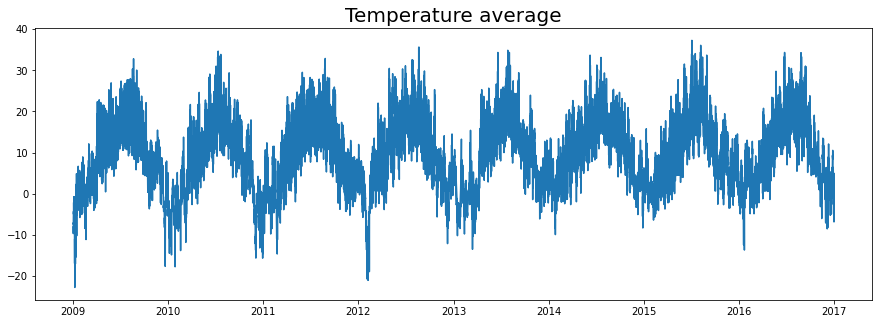

In [ ]:
dates = df_new['Date Time'].values
temp  = df_new['T (degC)'].values
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

In [ ]:
#drop kolom datetime untuk proses normalisasi MINMAX SCALER
df_new= df_new.drop(columns =['Date Time'])

In [ ]:
df_new

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


#SPLIT DATASET

In [ ]:
#bagi dataset
X= df_new.drop(columns =['T (degC)'])
y= df_new['T (degC)']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [ ]:
print('X_train = ', X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

X_train =  (56072, 13)
X_test =  (14019, 13)
y_train =  (56072,)
y_test =  (14019,)


#NILAI AMBANG BATAS (THRESHOLD)

In [ ]:
threshold_mae = (y.max() - y.min()) * 10/100
print(threshold_mae)

6.004000000000001


#IMPLEMENTASI MinMaxScaler()

In [ ]:
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

[[0.82643804 0.2467731  0.33472628 ... 0.01498929 0.02680851 0.53527778]
 [0.82763433 0.23250679 0.31404095 ... 0.0178444  0.02680851 0.52861111]
 [0.82982753 0.23335598 0.31633932 ... 0.01284797 0.02680851 0.46444444]
 ...
 [0.77120925 0.72129755 0.70768909 ... 0.0442541  0.05787234 0.39722222]
 [0.76722161 0.7155231  0.70706226 ... 0.05638829 0.05787234 0.5475    ]
 [0.76393181 0.7063519  0.70559967 ... 0.07922912 0.11148936 0.13677778]]
[[0.76163892 0.69769022 0.71103218 ... 0.11277659 0.09191489 0.09547222]
 [0.76024325 0.68070652 0.71709152 ... 0.01641685 0.02553191 0.05802778]
 [0.76273552 0.66151495 0.72106143 ... 0.01855817 0.02212766 0.7       ]
 ...
 [0.8731931  0.33067255 0.37400752 ... 0.05067809 0.06638298 0.44083333]
 [0.86780979 0.32897418 0.36878395 ... 0.02498216 0.02893617 0.60194444]
 [0.86242648 0.31216033 0.34914333 ... 0.03997145 0.04255319 0.56277778]]


#MEMBANGUN ARSITEKTUR MODEL

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
train_set = windowed_dataset(y_train, window_size=60, batch_size=100, shuffle_buffer=1000)
model = Sequential([
  Bidirectional(LSTM(64, return_sequences=True)), #IMPLEMENTASI Bidirectional LTSM
  Bidirectional(LSTM(32)),
  Dropout(0.5),
  Dense(30, activation="relu"),
  Dense(8, activation="relu"),
  Dropout(0.5),
  Dense(1)
])


In [ ]:
#IMPLEMENTASI CALLBACK
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<threshold_mae):
      print("\nMAE TELAH MENCAPAI NILAI <10% SKALA DATA")
      self.model.stop_training = True
callbacks = myCallback()

#Compile dan latih model dengan model.compile dan model.fit hingga mendapatkan nilai MAE < 10% SKALA DATA

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
hist = model.fit(
                    train_set,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[callbacks], #implementasi callback
                    steps_per_epoch=32,  # berapa batch yang akan dieksekusi pada setiap epoch
                    validation_steps=8,  # berapa batch yang akan dieksekusi pada setiap epoch   
                    epochs=15)

Epoch 1/15
32/32 [==============================] - 19s 327ms/step - loss: 6.9095 - mae: 7.3921 - val_loss: 11.1526 - val_mae: 11.6454
Epoch 2/15
32/32 [==============================] - 9s 274ms/step - loss: 14.5919 - mae: 15.0904 - val_loss: 11.0965 - val_mae: 11.5892
Epoch 3/15
32/32 [==============================] - 9s 278ms/step - loss: 6.2233 - mae: 6.7083 - val_loss: 11.0626 - val_mae: 11.5553
Epoch 4/15
32/32 [==============================] - 9s 276ms/step - loss: 9.2434 - mae: 9.7351 - val_loss: 11.0285 - val_mae: 11.5211
Epoch 5/15
32/32 [==============================] - 9s 277ms/step - loss: 12.1508 - mae: 12.6470 - val_loss: 10.9628 - val_mae: 11.4552
Epoch 6/15
32/32 [==============================] - ETA: 0s - loss: 4.9595 - mae: 5.4349
MAE TELAH MENCAPAI NILAI <10% SKALA DATA
32/32 [==============================] - 9s 282ms/step - loss: 4.9595 - mae: 5.4349 - val_loss: 10.9308 - val_mae: 11.4231


# Plot MAE dan LOSS pada saat training dan validation.

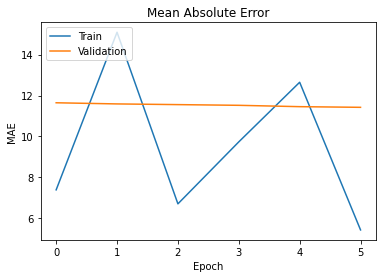

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

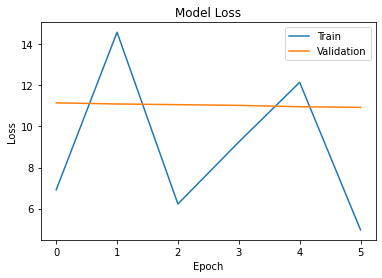

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()